In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [6]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [7]:
df['LogPassengers'] = np.log(df['Passengers'])

In [8]:
Ntest = 13
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [9]:
import pmdarima as pm

In [10]:
model = pm.auto_arima(train['Passengers'],
                      trace = True,
                      suppress_warnings = True,
                      seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=896.414, Time=2.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1009.587, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=896.831, Time=0.57 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=953.101, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1179.879, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=896.568, Time=1.55 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=896.398, Time=1.39 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=895.444, Time=0.42 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=894.320, Time=0.44 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=894.944, Time=3.12 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=895.147, Time=1.39 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=916.286, Time=0.30 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=896.559, Time=0.23 sec
 ARIMA(1,0,3)(0,1,0)[12] intercept 

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  131
Model:             SARIMAX(1, 0, 2)x(0, 1, [], 12)   Log Likelihood                -442.160
Date:                             Tue, 12 Mar 2024   AIC                            894.320
Time:                                     16:11:36   BIC                            908.216
Sample:                                 01-01-1949   HQIC                           899.963
                                      - 11-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.1498      3.090      2.637      0.008       2.093      14.207
ar.L1          0.7250      0.102      7.076      0.000       0.524       0.926
ma.L1          0.0037      0.116      0.032      0.975      -0.223       0.230
ma.L2          0.2623      0.144      1.819      0.069      -0.020       0.545
sigma2        97.8642     11.274      8.680      0.000      75.767     119.961
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 5.76
Prob(Q):                              0.71   Prob(JB):                         0.06
Heteroskedasticity (H):               1.24   Skew:                            -0.24
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
test_pred, conflint = model.predict(n_periods = Ntest, return_conf_int= True)

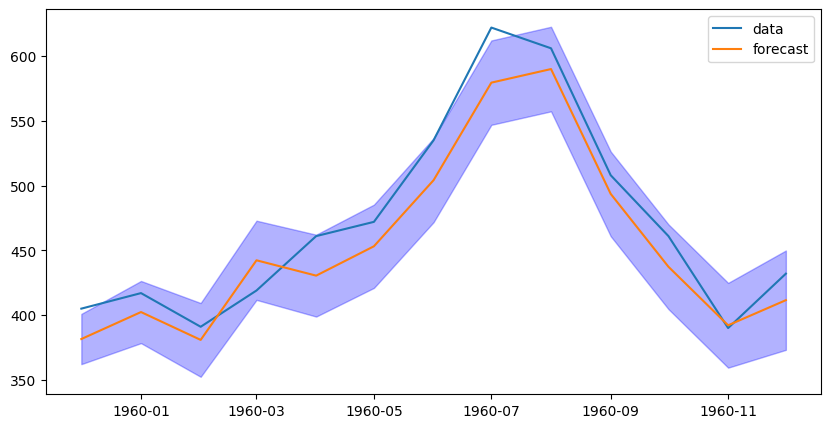

In [14]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['Passengers'], label = 'data')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, \
                conflint[:,0], conflint[:, 1], \
                color = 'blue', alpha = 0.3)

ax.legend();

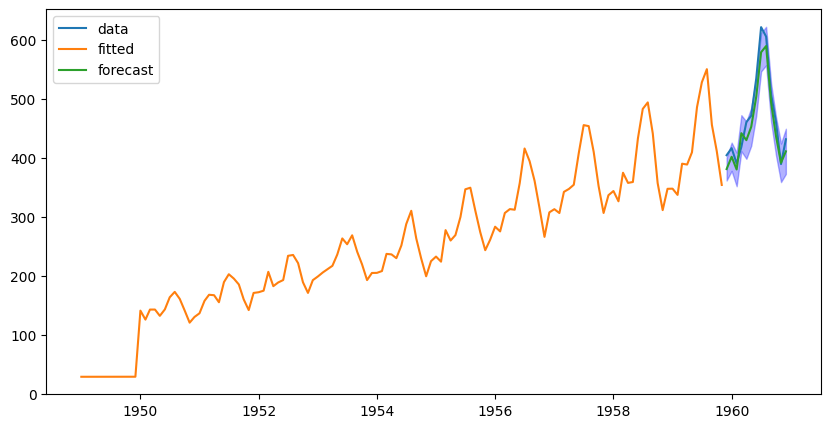

In [15]:
train_pred = model.predict_in_sample(start = 0, end = -1)


fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['Passengers'], label = 'data')
ax.plot(train.index, train_pred, label = 'fitted')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, \
                conflint[:,0], conflint[:, 1], \
                color = 'blue', alpha = 0.3)

ax.legend();

In [16]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace = True,
                      suppress_warnings = True,
                      seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-435.975, Time=2.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-315.252, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-428.641, Time=1.00 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-378.915, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.652, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-439.567, Time=1.92 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-411.402, Time=1.50 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-437.559, Time=9.51 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-432.510, Time=2.13 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-435.487, Time=6.90 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-440.811, Time=1.86 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-411.186, Time=0.84 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-435.606, Time=2.27 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-438.582, Time=4.17 sec
 ARIMA(1,0,2)(1,1,0

In [17]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  131
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 226.649
Date:                              Tue, 12 Mar 2024   AIC                           -443.298
Time:                                      16:28:27   BIC                           -429.403
Sample:                                  01-01-1949   HQIC                          -437.656
                                       - 11-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0190      0.009      2.114      0.035       0.001       0.037
ar.L1          0.5987      0.083      7.195      0.000       0.436       0.762
ar.L2          0.2449      0.085      2.879      0.004       0.078       0.412
ma.S.L12      -0.5625      0.106     -5.301      0.000      -0.770      -0.355
sigma2         0.0012      0.000      8.110      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.71
Prob(Q):                              1.00   Prob(JB):                         0.06
Heteroskedasticity (H):               0.36   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

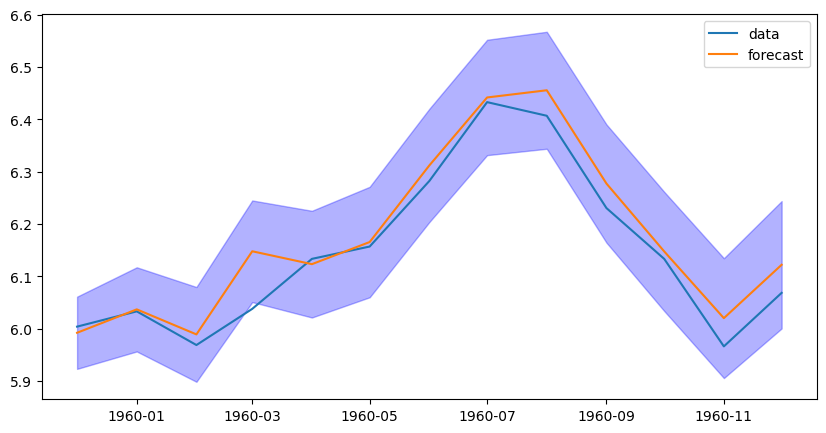

In [24]:
test_pred_log, conflint = logmodel.predict(n_periods = Ntest, return_conf_int= True)


fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['LogPassengers'], label = 'data')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, \
                conflint[:,0], conflint[:, 1], \
                color = 'blue', alpha = 0.3)

ax.legend();

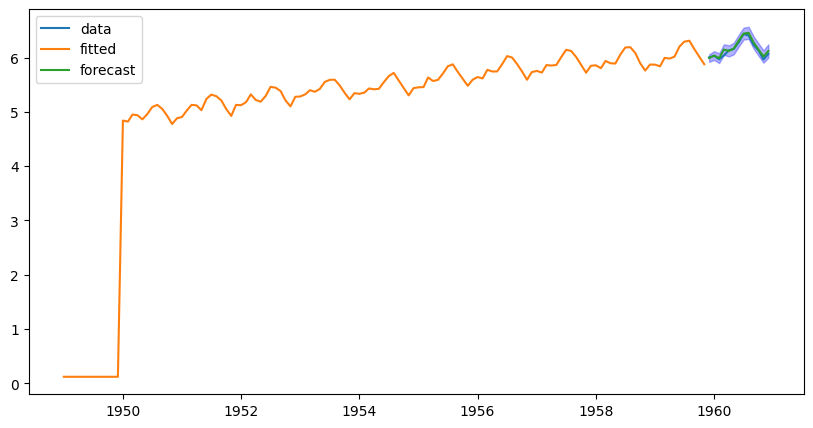

In [25]:
train_pred_log = logmodel.predict_in_sample(start = 0, end = -1)


fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['LogPassengers'], label = 'data')
ax.plot(train.index, train_pred, label = 'fitted')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, \
                conflint[:,0], conflint[:, 1], \
                color = 'blue', alpha = 0.3)

ax.legend();

In [26]:
def rmse(t, y):
  return np.sqrt(np.mean(t - y)**2)

In [28]:
print("Non - logged RMSE : ", rmse(test['Passengers'], test_pred))
print("Logged RMSE : ", rmse(test['LogPassengers'], test_pred_log))

Non - logged RMSE :  464.5206507835109
Logged RMSE :  0.029005567178136592


In [29]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace = True,
                      suppress_warnings = True,
                      seasonal = False, stepwise = True,
                         max_p=12, max_order= 14, max_q = 2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-237.331, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-210.273, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-213.527, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-215.375, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-211.336, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-243.702, Time=2.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-243.282, Time=0.94 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-248.693, Time=0.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-225.223, Time=0.88 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-247.881, Time=1.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-224.518, Time=0.93 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-232.443, Time=0.56 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0] interc

In [30]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 132.346
Date:                Tue, 12 Mar 2024   AIC                           -248.693
Time:                        16:33:42   BIC                           -225.752
Sample:                    01-01-1949   HQIC                          -239.371
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.002      5.162      0.000       0.006       0.013
ar.L1          0.0755      0.124      0.609      0.543      -0.168       0.318
ar.L2          0.4434      0.119      3.738      0.000       0.211       0.676
ar.L3         -0.2382      0.100     -2.374      0.018      -0.435      -0.042
ar.L4         -0.2347      0.106     -2.213      0.027      -0.442      -0.027
ma.L1         -0.0525      0.083     -0.633      0.527      -0.215       0.110
ma.L2         -0.8571      0.082    -10.460      0.000      -1.018      -0.697
sigma2         0.0075      0.001      5.475      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 5.91
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               1.03   Skew:                             0.24
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

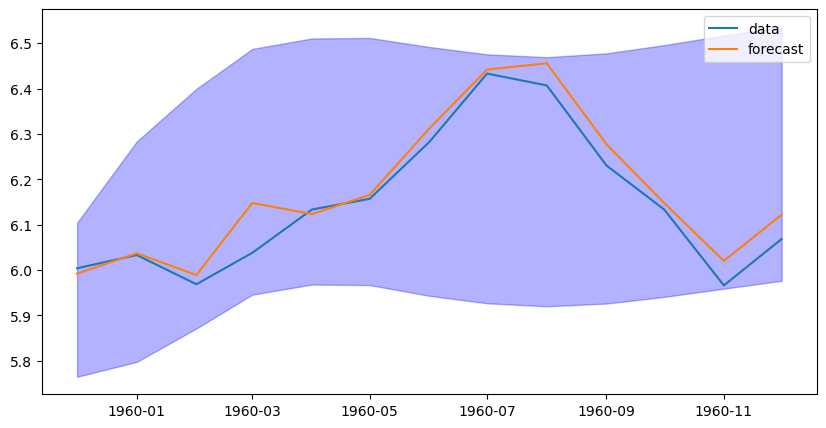

In [31]:
test_pred_log, conflint = logmodel.predict(n_periods = Ntest, return_conf_int= True)


fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['LogPassengers'], label = 'data')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, \
                conflint[:,0], conflint[:, 1], \
                color = 'blue', alpha = 0.3)

ax.legend();

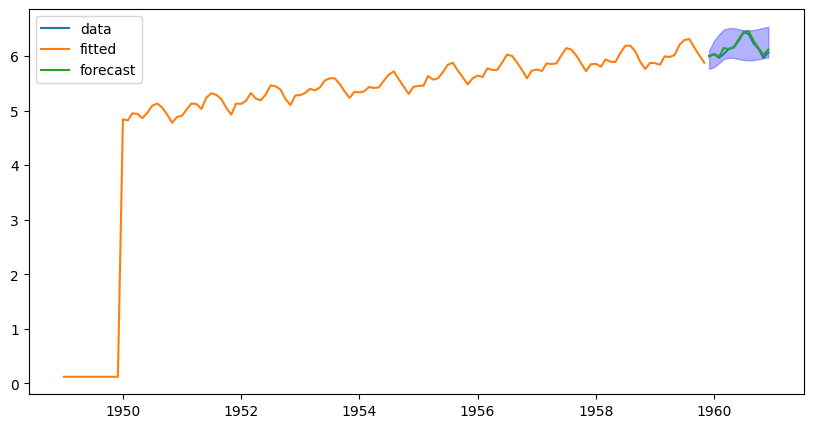

In [33]:
train_pred_log = logmodel.predict_in_sample(start = 1, end = -1)


fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['LogPassengers'], label = 'data')
ax.plot(train.index, train_pred, label = 'fitted')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, \
                conflint[:,0], conflint[:, 1], \
                color = 'blue', alpha = 0.3)

ax.legend();